In [11]:
#algorithms kd tree laso ball park direct neighbor find

import numpy as np
from sklearn.neighbors import KDTree
rng = np.random.RandomState(0)
X = rng.random_sample((10, 3))  # 10 points in 3 dimensions
tree = KDTree(X, leaf_size=2)              
dist, ind = tree.query(X[:1], k=10)                
print(X, X[1, -1])
print(ind)  # indices of 3 closest neighbors

print(dist)  # distances to 3 closest neighbors



[[0.5488135  0.71518937 0.60276338]
 [0.54488318 0.4236548  0.64589411]
 [0.43758721 0.891773   0.96366276]
 [0.38344152 0.79172504 0.52889492]
 [0.56804456 0.92559664 0.07103606]
 [0.0871293  0.0202184  0.83261985]
 [0.77815675 0.87001215 0.97861834]
 [0.79915856 0.46147936 0.78052918]
 [0.11827443 0.63992102 0.14335329]
 [0.94466892 0.52184832 0.41466194]] 0.6458941130666561
[[0 3 1 7 2 6 9 4 8 5]]
[[0.         0.19662693 0.29473397 0.398299   0.41689499 0.46672837
  0.47902444 0.57216693 0.63410319 0.86543108]]


In [8]:
#ball tree 
from sklearn.neighbors import BallTree
import numpy as np
import pickle
rng = np.random.RandomState(0)
X = rng.random_sample((10, 3))  # 10 points in 3 dimensions
tree = BallTree(X, leaf_size=2)        
s = pickle.dumps(tree)                     
tree_copy = pickle.loads(s)                
dist, ind = tree_copy.query(X[:1], k=3)     
print(ind)  # indices of 3 closest neighbors

print(dist)  # distances to 3 closest neighbors



#using radius on query
import numpy as np
rng = np.random.RandomState(0)
X = rng.random_sample((10, 3))  # 10 points in 3 dimensions
tree = BallTree(X, leaf_size=2)     
print("#no", tree.query_radius(X[:1], r=0.3, count_only=True))

ind = tree.query_radius(X[:1], r=0.3)  
print(ind)  # indices of neighbors within distance 0.3

[[0 3 1]]
[[0.         0.19662693 0.29473397]]
#no [3]
[array([3, 0, 1], dtype=int64)]


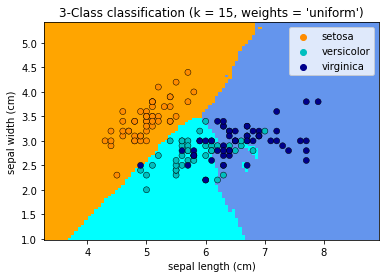

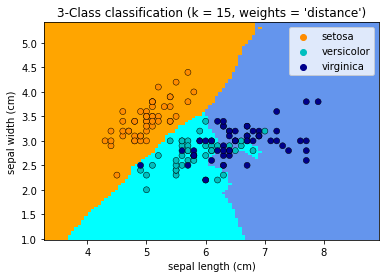

In [12]:
#simple knn using iris
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
from sklearn.inspection import DecisionBoundaryDisplay

n_neighbors = 15

# import some data to play with
iris = datasets.load_iris()

# we only take the first two features. We could avoid this ugly
# slicing by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

# Create color maps
cmap_light = ListedColormap(["orange", "cyan", "cornflowerblue"])
cmap_bold = ["darkorange", "c", "darkblue"]

for weights in ["uniform", "distance"]:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    _, ax = plt.subplots()
    DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        cmap=cmap_light,
        ax=ax,
        response_method="predict",
        plot_method="pcolormesh",
        xlabel=iris.feature_names[0],
        ylabel=iris.feature_names[1],
        shading="auto",
    )

    # Plot also the training points
    sns.scatterplot(
        x=X[:, 0],
        y=X[:, 1],
        hue=iris.target_names[y],
        palette=cmap_bold,
        alpha=1.0,
        edgecolor="black",
    )
    plt.title(
        "3-Class classification (k = %i, weights = '%s')" % (n_neighbors, weights)
    )

plt.show()